In [1]:
import tensorflow as tf
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
#Dataset1

#Features
X = np.array([[1,1],[4,2],[4,3],[4,5],[1,5],[10,10],[12,11],[14,8],[8,13],[10,14]])

#Labels
Y = np.array([0,0,0,0,0,1,1,1,1,1]).reshape(10,1)

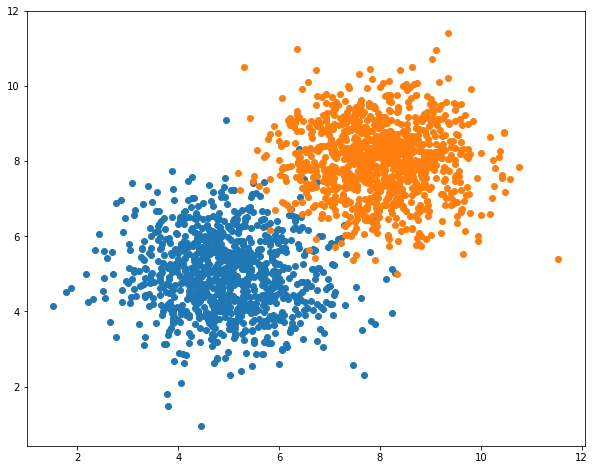

In [233]:
#dataset2
mean1=np.array([5,5])
cov1=np.array([[1,0],[0,1]])
class1=np.random.multivariate_normal(mean1,cov1,1000)
mean2=np.array([8,8])
cov2=np.array([[1,0],[0,1]])
class2=np.random.multivariate_normal(mean2,cov2,1000)
plt.figure(figsize=(10,8))
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1])
plt.show()

In [234]:
X=np.append(class1,class2,axis=0)

Y=np.append(np.zeros(1000),np.ones(1000)).reshape(2000,1)
X.shape,Y.shape

((2000, 2), (2000, 1))

In [104]:
import matplotlib.pyplot as plt

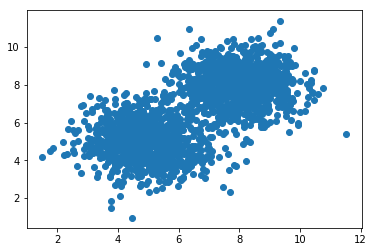

In [235]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [418]:
m = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

x = tf.placeholder(dtype=tf.float32, shape=[2000, 2])
y = tf.placeholder(dtype=tf.float32, shape=[2000, 1])

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [419]:
mod = tf.matmul(x, m) + b

In [420]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=y))

In [421]:
learning_rate = 0.0053
iter_num = 1500
opt = tf.train.GradientDescentOptimizer(learning_rate)
goal = opt.minimize(loss)
ma=[]
ba=[]


In [422]:
for epoch in range(iter_num):
    sess.run(goal, feed_dict={x:X, y: Y})
    temp_loss = sess.run(loss, feed_dict={x: X, y: Y})
    tm=sess.run(m,feed_dict={x: X, y: Y})
    ma.append(tm)
    tb=sess.run(b,feed_dict={x: X, y: Y})
    ba.append(tb)
    if (epoch + 1) % 300 == 0:
        print(temp_loss)

tm,tb 

0.37976068
0.36632758
0.3568218
0.34945348
0.3432685


(array([[0.40641403],
        [0.25033295]], dtype=float32), array([[-3.9666283]], dtype=float32))

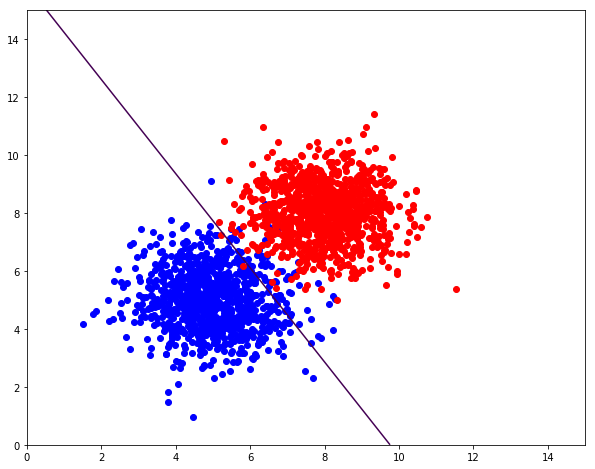

In [423]:
x = np.linspace(0, 15.0, 100)
y = np.linspace(0, 15.0, 100)
Xp, Yp = np.meshgrid(x,y)
F = Xp*tm[0] + Yp*tm[1] +tb
plt.figure(figsize=(10,8))
plt.contour(Xp,Yp,F,[0])
plt.scatter(class1[:,0],class1[:,1], c='b')
plt.scatter(class2[:,0],class2[:,1], c='r')